## Inteligență Artificială  Tema 1 - 2025: Sokoban

Responsabili:
- Andrei Olaru
- Cătălin Chiru
- Andrei Dugăeșescu
- Mihai Nan
- Vlad Matei Drăghici
- Alexandru Baciu
- Bogdan-Andrei Sprîncenatu

# Imports

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np

from search_methods.solver import Solver
from search_methods.heuristics import misplaced_heuristic
from search_methods.heuristics import manhattan_heuristic
from search_methods.heuristics import manhattan_heuristic_var1
from search_methods.heuristics import manhattan_heuristic_var2
from search_methods.heuristics import manhattan_heuristic_var4_with_misplaced

# Global

In [2]:
MAP_NAMES = [
    'easy_map1', 'easy_map2',
    'medium_map1', 'medium_map2',
    'hard_map1', 'hard_map2',
    'large_map1', 'large_map2',
    'super_hard_map1'
]

OUTPUT_DIR = 'results'
if not os.path.exists(OUTPUT_DIR):
    os.makedirs(OUTPUT_DIR)

ALGORITHMS = ['sa', 'lrta*']

SA_PARAMS = {
    't_init': 100.0,
    't_final': 0.1,
    'cooling': 0.9999,
    'max_iters': 100000,
    'seed': 42,
    'heuristic': manhattan_heuristic
}
LRTA_PARAMS = {
    'max_steps': 50000,
    'h': manhattan_heuristic
}

SA_PARAMS_VAR1 = {
    't_init': 100.0,
    't_final': 0.1,
    'cooling': 0.9999,
    'max_iters': 100000,
    'seed': 42,
    'heuristic': manhattan_heuristic_var1
}
LRTA_PARAMS_VAR1 = {
    'max_steps': 50000,
    'h': manhattan_heuristic_var1
}

SA_PARAMS_VAR2 = {
    't_init': 100.0,
    't_final': 0.1,
    'cooling': 0.9999,
    'max_iters': 100000,
    'seed': 42,
    'heuristic': manhattan_heuristic_var2
}
LRTA_PARAMS_VAR2 = {
    'max_steps': 50000,
    'h': manhattan_heuristic_var2
}

SA_PARAMS_VAR4_WITH_MISPLACED = {
    't_init': 100.0,
    't_final': 0.1,
    'cooling': 0.9999,
    'max_iters': 100000,
    'seed': 42,
    'heuristic': manhattan_heuristic_var4_with_misplaced
}
LRTA_PARAMS_VAR4_WITH_MISPLACED = {
    'max_steps': 50000,
    'h': manhattan_heuristic_var4_with_misplaced
}

SA_PARAMS_MISPLACED = {
    't_init': 100.0,
    't_final': 0.1,
    'cooling': 0.9999,
    'max_iters': 100000,
    'seed': 42,
    'heuristic': misplaced_heuristic
}
LRTA_PARAMS_MISPLACED = {
    'max_steps': 50000,
    'h': misplaced_heuristic
}

# Initialize Solver

In [3]:
solver = Solver(input_dir='tests', output_dir='results')

# Plotting function

In [4]:
def plot_results(output_dir='results'):
    # Rulare algoritmi cu euristica principala
    print("=================== RUNNING MAIN HEURISTIC ===================")
    results = solver.run_all(
        map_names=MAP_NAMES,
        algorithms=ALGORITHMS,
        sa_params=SA_PARAMS,
        lrta_params=LRTA_PARAMS
    )

    if not results:
        print("No results to plot.")
        return

    os.makedirs(output_dir, exist_ok=True)

    # Pretire rezultate pt plot
    results_by_algo_map = {}
    map_names_set = set()
    algos_set = set()

    for res in results:
        algo = res['algorithm']
        map_name = res['map']
        algos_set.add(algo)
        map_names_set.add(map_name)
        results_by_algo_map.setdefault(algo, {})[map_name] = res

    map_names = sorted(map_names_set)
    algos = sorted(algos_set)
    x = np.arange(len(map_names))
    width = 0.8 / len(algos)

    # --------- PLOT 1: Comparare dupa timpul de executie ----------
    fig, ax = plt.subplots(figsize=(12, 6))
    for i, algo in enumerate(algos):
        times = [results_by_algo_map.get(algo, {}).get(m, {}).get('execution_time', 0) for m in map_names]
        ax.bar(x + i * width, times, width, label=algo.upper())
    ax.set_title('Execution Time')
    ax.set_xticks(x + width * (len(algos)-1) / 2)
    ax.set_xticklabels(map_names, rotation=45, ha='right')
    ax.set_ylabel('Time (s)')
    ax.legend()
    fig.tight_layout()
    plt.savefig(os.path.join(output_dir, 'execution_time.png'))
    plt.show()

    # --------- PLOT 2: Comparare dupa numarul de stari construite ----------
    fig, ax = plt.subplots(figsize=(12, 6))
    for i, algo in enumerate(algos):
        states = [results_by_algo_map.get(algo, {}).get(m, {}).get('built_states', 0) for m in map_names]
        ax.bar(x + i * width, states, width, label=algo.upper())
    ax.set_title('Built States')
    ax.set_xticks(x + width * (len(algos)-1) / 2)
    ax.set_xticklabels(map_names, rotation=45, ha='right')
    ax.set_ylabel('States')
    ax.legend()
    fig.tight_layout()
    plt.savefig(os.path.join(output_dir, 'built_states.png'))
    plt.show()

    # --------- PLOT 3: Comparare dupa numarul de miscari PULL ----------
    if any(r.get('solved', False) for r in results):
        fig, ax = plt.subplots(figsize=(12, 6))
        for i, algo in enumerate(algos):
            pulls = [results_by_algo_map.get(algo, {}).get(m, {}).get('pull_moves', 0) if results_by_algo_map.get(algo, {}).get(m, {}).get('solved', False) else 0 for m in map_names]
            ax.bar(x + i * width, pulls, width, label=algo.upper())
        ax.set_title('Pull Moves')
        ax.set_xticks(x + width * (len(algos)-1) / 2)
        ax.set_xticklabels(map_names, rotation=45, ha='right')
        ax.set_ylabel('Pull Moves')
        ax.legend()
        fig.tight_layout()
        plt.savefig(os.path.join(output_dir, 'pull_moves.png'))
        plt.show()

    # =================== COMPARARE EURISTICI ===================

    heuristic_variants = {
        'FinalHeuristic': (SA_PARAMS, LRTA_PARAMS),
        'Manhattan_var1': (SA_PARAMS_VAR1, LRTA_PARAMS_VAR1),
        'Manhattan_var2': (SA_PARAMS_VAR2, LRTA_PARAMS_VAR2),
        'Manhattan_var4_with_misplaced': (SA_PARAMS_VAR4_WITH_MISPLACED, LRTA_PARAMS_VAR4_WITH_MISPLACED),
        'Misplaced': (SA_PARAMS_MISPLACED, LRTA_PARAMS_MISPLACED),
    }

    # Rulare algoritmi cu fiecare euristica
    print("=================== RUNNING ALL HEURISTICS ONE BY ONE ===================")
    heuristic_results = {}
    for h_name, (sa_p, lrta_p) in heuristic_variants.items():
        heuristic_results[h_name] = solver.run_all(
            map_names=MAP_NAMES,
            algorithms=ALGORITHMS,
            sa_params=sa_p,
            lrta_params=lrta_p
        )

    # Construire date pt plot
    algo_to_plot = 'lrta*'
    metric = 'built_states'

    fig, ax = plt.subplots(figsize=(12, 6))
    num_heuristics = len(heuristic_variants)
    width_h = 0.8 / num_heuristics
    x = np.arange(len(MAP_NAMES))

    for i, (h_name, res_list) in enumerate(heuristic_results.items()):
        values = []
        for map_name in MAP_NAMES:
            found = next((r.get(metric, 0) for r in res_list if r['algorithm'] == algo_to_plot and r['map'] == map_name), 0)
            values.append(found)
        ax.bar(x + i * width_h, values, width_h, label=h_name)

    ax.set_title(f'Explored States by Heuristic ({algo_to_plot.upper()})')
    ax.set_xticks(x + width_h * (num_heuristics-1) / 2)
    ax.set_xticklabels(MAP_NAMES, rotation=45, ha='right')
    ax.set_ylabel('Explored States')
    ax.set_yscale('log')
    ax.legend()
    fig.tight_layout()
    plt.savefig(os.path.join(output_dir, f'heuristic_comparison_{algo_to_plot}_{metric}.png'))
    plt.show()

# Solving

=================== RUNNING MAIN HEURISTIC ===================

=== Algo sa on easy_map1 ===
SA: Using seed 42
Solved? True, Time=0.157s, Iterations=2656, Explored states=2655, Pulls=75

=== Algo lrta* on easy_map1 ===
Solved? True, Time=0.009s, Iterations=71, Explored states=425, Pulls=3

=== Algo sa on easy_map2 ===
SA: Using seed 42
Solved? True, Time=0.007s, Iterations=238, Explored states=237, Pulls=17

=== Algo lrta* on easy_map2 ===
Solved? True, Time=0.002s, Iterations=17, Explored states=119, Pulls=0

=== Algo sa on medium_map1 ===
SA: Using seed 42
Solved? True, Time=0.526s, Iterations=9919, Explored states=9918, Pulls=12

=== Algo lrta* on medium_map1 ===
Solved? True, Time=0.005s, Iterations=26, Explored states=212, Pulls=4

=== Algo sa on medium_map2 ===
SA: Using seed 42
Solved? True, Time=0.558s, Iterations=11154, Explored states=11153, Pulls=316

=== Algo lrta* on medium_map2 ===
Solved? True, Time=0.057s, Iterations=275, Explored states=2060, Pulls=13

=== Algo sa on h

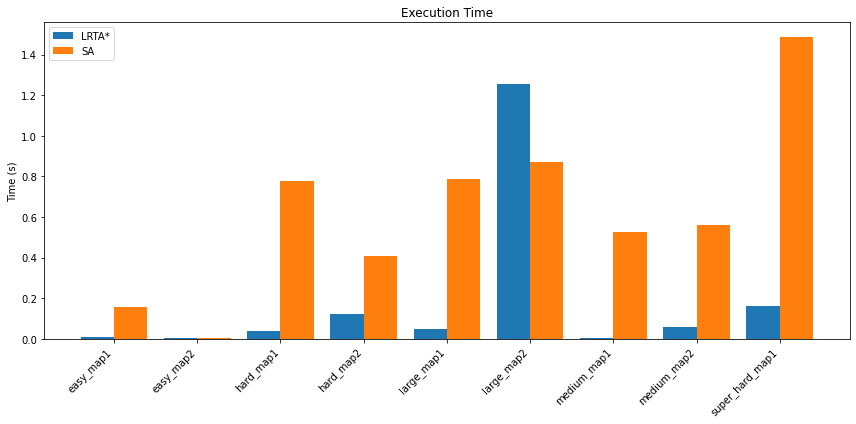

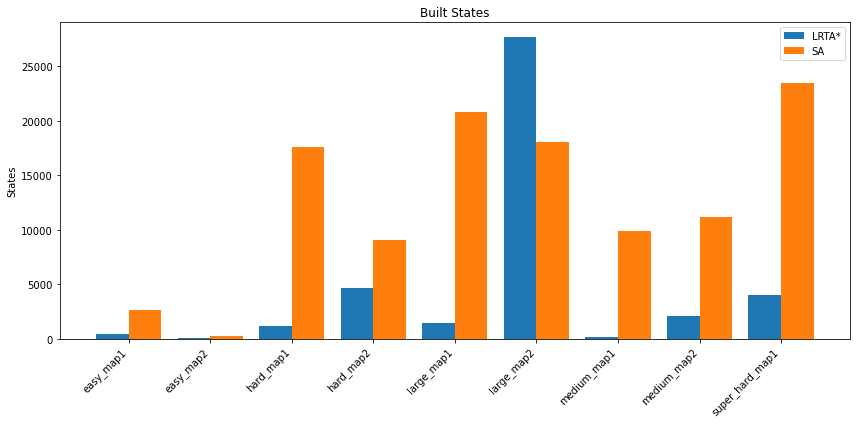

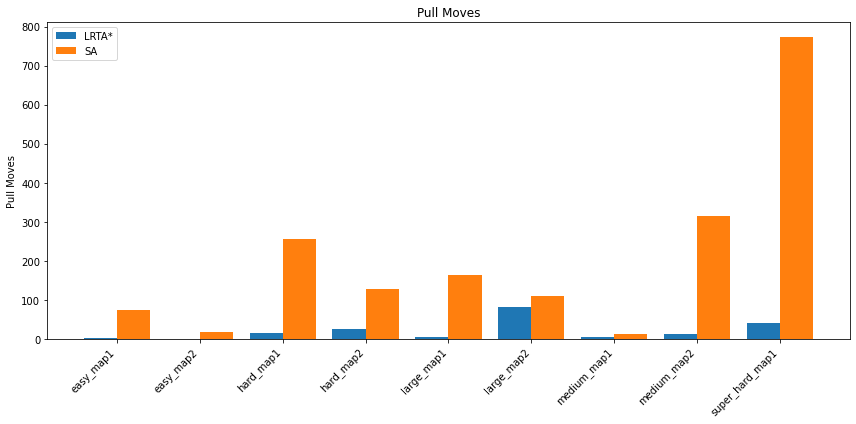

=================== RUNNING ALL HEURISTICS ONE BY ONE ===================

=== Algo sa on easy_map1 ===
SA: Using seed 42
Solved? True, Time=0.103s, Iterations=2656, Explored states=2655, Pulls=75

=== Algo lrta* on easy_map1 ===
Solved? True, Time=0.009s, Iterations=71, Explored states=425, Pulls=3

=== Algo sa on easy_map2 ===
SA: Using seed 42
Solved? True, Time=0.007s, Iterations=238, Explored states=237, Pulls=17

=== Algo lrta* on easy_map2 ===
Solved? True, Time=0.002s, Iterations=17, Explored states=119, Pulls=0

=== Algo sa on medium_map1 ===
SA: Using seed 42
Solved? True, Time=0.418s, Iterations=9919, Explored states=9918, Pulls=12

=== Algo lrta* on medium_map1 ===
Solved? True, Time=0.006s, Iterations=26, Explored states=212, Pulls=4

=== Algo sa on medium_map2 ===
SA: Using seed 42
Solved? True, Time=0.570s, Iterations=11154, Explored states=11153, Pulls=316

=== Algo lrta* on medium_map2 ===
Solved? True, Time=0.054s, Iterations=275, Explored states=2060, Pulls=13

=== A

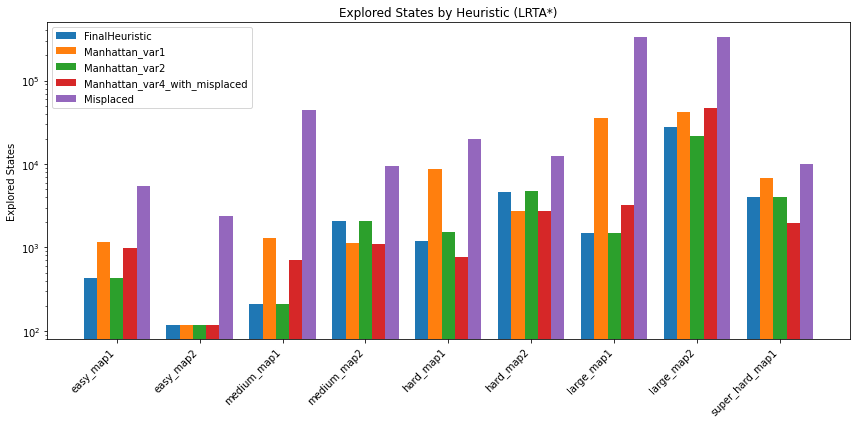

In [5]:
plot_results(output_dir=OUTPUT_DIR)